## Using linear regression for classification

* classifier를 구현하기 위한 가장 간단한 방법 중 하나는 linear regression algorithm을 수정하는 것이다.
* linear regression model은 f(x) = wx 같이 선형으로 보이는 함수들의 집합이며, 연속적인 실수를 입력으로 받아 연속적인 실수를 출력으로 생성한다.
* 기억할 것은 classification은 연속이 아닌 이산 출력이란 점이다.
* regression 모델이 두 가지 형태의 값을 출력할 경우, 어떠한 임계치를 주고 해당 임계치보다 높다면 1, 낮다면 0을 줄 수도 있다.

<img src="./fig/fig1.png" />
<img src="./fig/fig2.png" />

* 데이터를 line으로 모델링했기 때문에 입력은 0~1 사이의 값을 출력으로 나타낼 수 있다.
* 어떤 하나의 아이템이 하나의 카테고리에 속하는지 아니면 다른 카테고리에 속하는지를 결정해야 할 필요가 있으며, 대부분의 경우 0.5를 기준으로 판단한다.

(0, 9.6357222)
(100, 2.3595579)
(200, 2.1380048)
(300, 2.1310213)
(400, 2.1308012)
(500, 2.1307943)
(600, 2.130794)
(700, 2.130794)
(800, 2.130794)
(900, 2.130794)
('learning parameters', array([ 0.93268234, -0.08548057], dtype=float32))
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]
('accuracy', 1.0)


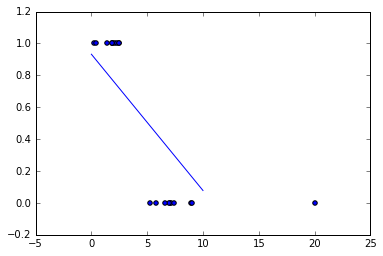

In [17]:
import tensorflow as tf
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline

x_label0 = np.random.normal(7,1,10)
x_label1 = np.random.normal(2,1,10)
#x_label0 = np.append(np.random.normal(7,1,9),20)
xs = np.append(x_label0, x_label1)
labels = [0.] * len(x_label0) + [1.] * len(x_label1)

plt.scatter(xs, labels)

learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder("float")
Y = tf.placeholder("float")

def model(X,w):
    return tf.add(tf.mul(w[1], tf.pow(X,1)),
                 tf.mul(w[0], tf.pow(X,0)))

w = tf.Variable([0., 0.], name="parameters")
y_model = model(X, w)
cost = tf.reduce_sum(tf.square(Y-y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    sess.run(train_op, feed_dict={X: xs, Y: labels})
    current_cost = sess.run(cost, feed_dict={X:xs, Y:labels})
    if epoch % 100 == 0:
        print(epoch, current_cost)
        
w_val = sess.run(w)
print('learning parameters', w_val)

correct_prediction = tf.equal(Y, tf.to_float(tf.greater(y_model, 0.5)))

test = tf.to_float(tf.greater(y_model, 0.5))

print(sess.run(test, feed_dict={X:xs}))
accuracy = tf.reduce_mean(tf.to_float(correct_prediction))

print('accuracy', sess.run(accuracy, feed_dict={X:xs, Y: labels}))

sess.close()

all_xs = np.linspace(0,10, 100)
plt.plot(all_xs, all_xs*w_val[1] + w_val[0])
plt.show()

## Using one-dimensional logistic regression

(0, 0.69314593)
(1, 0.65425003)
(2, 0.61911219)
(3, 0.58734435)
(4, 0.55858511)
(5, 0.53250402)
(6, 0.50880367)
(7, 0.48721743)
(8, 0.46750978)
(9, 0.44947153)
(10, 0.43292004)
(11, 0.41769436)
(12, 0.40365303)
(13, 0.39067286)
(14, 0.37864447)
(15, 0.36747241)
(16, 0.35707319)
(17, 0.34737203)
(18, 0.33830366)
(19, 0.32981011)
(20, 0.32183993)
(21, 0.31434718)
(22, 0.30729139)
(23, 0.30063587)
(24, 0.29434797)
(25, 0.2883988)
(26, 0.28276142)
(27, 0.27741241)
(28, 0.27233037)
(29, 0.26749557)
(30, 0.26289082)
(31, 0.25849989)
(32, 0.25430796)
(33, 0.2503022)
(34, 0.24646999)
(35, 0.24280061)
(36, 0.23928344)
(37, 0.23590939)
(38, 0.23266974)
(39, 0.22955643)
(40, 0.2265622)
(41, 0.22368029)
(42, 0.22090441)
(43, 0.21822867)
(44, 0.21564759)
(45, 0.21315639)
(46, 0.21075006)
(47, 0.20842448)
(48, 0.20617558)
(49, 0.2039995)
(50, 0.20189261)
(51, 0.19985159)
(52, 0.19787356)
(53, 0.19595532)
(54, 0.19409433)
(55, 0.19228785)
(56, 0.19053367)
(57, 0.18882923)
(58, 0.18717258)
(59, 0.1855

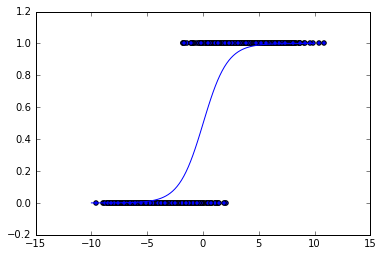

In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

learning_rate = 0.01
training_epochs = 1000

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

x1 = np.random.normal(-4, 2, 1000)
x2 = np.random.normal(4, 2, 1000)
xs = np.append(x1, x2)
ys = np.asarray([0.] * len(x1) + [1.] * len(x2))

plt.scatter(xs,ys)

X = tf.placeholder(tf.float32, shape=(None,), name="x")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0., 0.], name="parameter", trainable=True)
y_model = tf.sigmoid(-(w[1] * X + w[0]))
cost = tf.reduce_mean(-tf.log(y_model*Y + (1-y_model) * (1 - Y)))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], {X:xs, Y:ys})
        print(epoch, err)
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err
    w_val = sess.run(w, {X:xs, Y: ys})
    
all_xs = np.linspace(-10, 10, 100)
plt.plot(all_xs, sigmoid(-(all_xs * w_val[1] + w_val[0])))
plt.show()

## Using two-dimensional logistic regression

2000
(0, 0.69314593)
(1, 0.61052299)
(2, 0.60394603)
(3, 0.59908289)
(4, 0.59435093)
(5, 0.58973789)
(6, 0.58523756)
(7, 0.58084661)
(8, 0.57656044)
(9, 0.5723744)
(10, 0.56828547)
(11, 0.56428933)
(12, 0.56038249)
(13, 0.55656153)
(14, 0.55282295)
(15, 0.54916394)
(16, 0.54558069)
(17, 0.54207128)
(18, 0.53863221)
(19, 0.53526115)
(20, 0.53195566)
(21, 0.52871293)
(22, 0.52553093)
(23, 0.52240759)
(24, 0.51934034)
(25, 0.51632732)
(26, 0.51336694)
(27, 0.51045716)
(28, 0.50759602)
(29, 0.50478208)
(30, 0.50201368)
(31, 0.4992893)
(32, 0.49660742)
(33, 0.49396661)
(34, 0.49136555)
(35, 0.4888033)
(36, 0.48627809)
(37, 0.48378915)
(38, 0.48133507)
(39, 0.47891536)
(40, 0.47652838)
(41, 0.4741734)
(42, 0.47184941)
(43, 0.46955547)
(44, 0.46729112)
(45, 0.46505499)
(46, 0.46284667)
(47, 0.46066523)
(48, 0.45850992)
(49, 0.45638037)
(50, 0.45427552)
(51, 0.4521949)
(52, 0.45013788)
(53, 0.44810387)
(54, 0.44609222)
(55, 0.44410264)
(56, 0.44213441)
(57, 0.44018716)
(58, 0.43826026)
(59, 0.

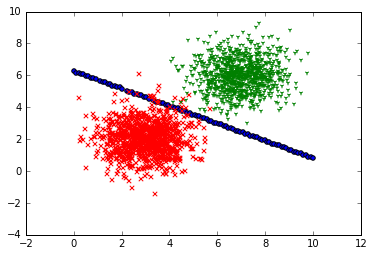

In [27]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

learning_rate = 0.1
training_epochs = 2000

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

x1_label1 = np.random.normal(3, 1, 1000)
x2_label1 = np.random.normal(2, 1, 1000)
x1_label2 = np.random.normal(7, 1, 1000)
x2_label2 = np.random.normal(6, 1, 1000)
x1s = np.append(x1_label1, x1_label2)
x2s = np.append(x2_label1, x2_label2)
ys = np.asarray([0.] * len(x1_label1) + [1.] * len(x1_label2))

X1 = tf.placeholder(tf.float32, shape=(None,), name="x1")
X2 = tf.placeholder(tf.float32, shape=(None,), name="x2")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0., 0., 0.], name="w", trainable=True)

y_model = tf.sigmoid(-(w[2] * X2 + w[1] * X1 + w[0]))
cost = tf.reduce_mean(-tf.log(y_model * Y + (1 - y_model) * (1-Y)))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], {X1: x1s, X2:x2s, Y:ys})
        print(epoch, err)
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err
    w_val = sess.run(w, {X1: x1s, X2: x2s, Y: ys})
    
x1_boundary, x2_boundary = [], []
for x1_test in np.linspace(0, 10, 100):
    for x2_test in np.linspace(0, 10, 100):
        z = sigmoid(-x2_test*w_val[2] - x1_test*w_val[1] - w_val[0])
        if abs(z - 0.5) < 0.01:
            x1_boundary.append(x1_test)
            x2_boundary.append(x2_test)
            
plt.scatter(x1_boundary, x2_boundary, c="b", marker="o", s=20)
plt.scatter(x1_label1, x2_label1, c="r", marker="x", s=20)
plt.scatter(x1_label2, x2_label2, c="g", marker="1", s=20)

plt.show()

## Visualizing multiclass data

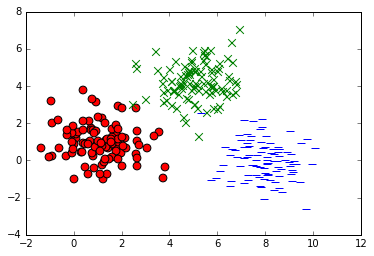

In [47]:
import numpy as np
import matplotlib.pyplot as plt

x1_label0 = np.random.normal(1, 1, (100,1))
x2_label0 = np.random.normal(1, 1, (100,1))
x1_label1 = np.random.normal(5, 1, (100,1))
x2_label1 = np.random.normal(4, 1, (100,1))
x1_label2 = np.random.normal(8, 1, (100,1))
x2_label2 = np.random.normal(0, 1, (100,1))

plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60)
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60)
plt.scatter(x1_label2, x2_label2, c='b', marker='_', s=60)
plt.show()

## Setting up training and test data for multiclass classification

In [48]:
xs_label0 = np.hstack((x1_label0, x2_label0))
xs_label1 = np.hstack((x1_label1, x2_label1))
xs_label2 = np.hstack((x1_label2, x2_label2))
xs = np.vstack((xs_label0, xs_label1, xs_label2))

labels = np.matrix([[1., 0., 0.]] * len(x1_label0) + [[0., 1., 0.]] * len(x1_label1) + [[0., 0., 1.]] * len(x1_label2))

arr = np.arange(xs.shape[0])
np.random.shuffle(arr)

xs = xs[arr, :]

labels = labels[arr, :]

test_x1_label0 = np.random.normal(1, 1, (10,1))
test_x2_label0 = np.random.normal(1, 1, (10,1))
test_x1_label1 = np.random.normal(5, 1, (10,1))
test_x2_label1 = np.random.normal(4, 1, (10,1))
test_x1_label2 = np.random.normal(8, 1, (10,1))
test_x2_label2 = np.random.normal(0, 1, (10,1))
test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0))
test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1))
test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2))

test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2))
test_labels = np.matrix([[1., 0., 0.]] * 10 + [[0., 1., 0.]] * 10 + [[0., 0., 1.]] * 10)

train_size, num_features = xs.shape

## Using softmax regression

In [53]:
import tensorflow as tf

learinig_rate = 0.01
training_epochs = 1000
num_labels = 3
batch_size = 100

X = tf.placeholder("float", shape=[None, num_features])
Y = tf.placeholder("float", shape=[None, num_labels])

W = tf.Variable(tf.zeros([num_features, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))
y_model = tf.nn.softmax(tf.matmul(X, W) + b)

cost = -tf.reduce_sum(Y * tf.log(y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

## Executing the graph

In [55]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    for step in range(training_epochs * train_size // batch_size):
        offset = (step * batch_size) % train_size
        batch_xs = xs[offset:(offset+batch_size), :]
        batch_labels = labels[offset:(offset+batch_size)]
        err,_ = sess.run([cost, train_op], feed_dict={X: batch_xs, Y: batch_labels})
        print (step,err)
        W_val = sess.run(W)
        print ('w', W_val)
        b_val = sess.run(b)
        print ('b', b_val)
        print "accuracy", accuracy.eval(feed_dict={X: test_xs, Y: test_labels})

(0, 109.8612)
('w', array([[-10.95786381,   7.4587059 ,   3.49915814],
       [ -3.05944109,  10.16121769,  -7.10177708]], dtype=float32))
('b', array([ 0.2666668 ,  0.86666614, -1.13333261], dtype=float32))
accuracy 0.333333
(1, nan)
('w', array([[ nan,  nan,  nan],
       [ nan,  nan,  nan]], dtype=float32))
('b', array([ nan,  nan,  nan], dtype=float32))
accuracy 0.333333
(2, nan)
('w', array([[ nan,  nan,  nan],
       [ nan,  nan,  nan]], dtype=float32))
('b', array([ nan,  nan,  nan], dtype=float32))
accuracy 0.333333
(3, nan)
('w', array([[ nan,  nan,  nan],
       [ nan,  nan,  nan]], dtype=float32))
('b', array([ nan,  nan,  nan], dtype=float32))
accuracy 0.333333
(4, nan)
('w', array([[ nan,  nan,  nan],
       [ nan,  nan,  nan]], dtype=float32))
('b', array([ nan,  nan,  nan], dtype=float32))
accuracy 0.333333
(5, nan)
('w', array([[ nan,  nan,  nan],
       [ nan,  nan,  nan]], dtype=float32))
('b', array([ nan,  nan,  nan], dtype=float32))
accuracy 0.333333
(6, nan)
('w',

In [ ]:
10 / 2